In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [6]:
heart_disease= pd.read_csv('Heart_Disease_Prediction.csv')

In [7]:
heart_disease.head() #printing first five rows of dataset

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [27]:
heart_disease.tail() #printing last five rows of dataset

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,HeartDisease_column_encoded
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence,0
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence,1


In [28]:
heart_disease.shape #it tells the number of rows and column in our dataset

(270, 15)

In [29]:
heart_disease.info() #getting info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          270 non-null    int64  
 1   Sex                          270 non-null    int64  
 2   Chest pain type              270 non-null    int64  
 3   BP                           270 non-null    int64  
 4   Cholesterol                  270 non-null    int64  
 5   FBS over 120                 270 non-null    int64  
 6   EKG results                  270 non-null    int64  
 7   Max HR                       270 non-null    int64  
 8   Exercise angina              270 non-null    int64  
 9   ST depression                270 non-null    float64
 10  Slope of ST                  270 non-null    int64  
 11  Number of vessels fluro      270 non-null    int64  
 12  Thallium                     270 non-null    int64  
 13  Heart Disease       

In [30]:
heart_disease.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,HeartDisease_column_encoded
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


# PREPROCESSING: Encoding

In [31]:
data_types= heart_disease.dtypes
print(data_types)

Age                              int64
Sex                              int64
Chest pain type                  int64
BP                               int64
Cholesterol                      int64
FBS over 120                     int64
EKG results                      int64
Max HR                           int64
Exercise angina                  int64
ST depression                  float64
Slope of ST                      int64
Number of vessels fluro          int64
Thallium                         int64
Heart Disease                   object
HeartDisease_column_encoded      int64
dtype: object


In [14]:
heart_disease['Heart Disease'].unique()

array(['Presence', 'Absence'], dtype=object)

In [15]:
label_encoder=LabelEncoder()
heart_disease['HeartDisease_column_encoded'] = label_encoder.fit_transform(heart_disease['Heart Disease'])



In [16]:
print(heart_disease.dtypes)

Age                              int64
Sex                              int64
Chest pain type                  int64
BP                               int64
Cholesterol                      int64
FBS over 120                     int64
EKG results                      int64
Max HR                           int64
Exercise angina                  int64
ST depression                  float64
Slope of ST                      int64
Number of vessels fluro          int64
Thallium                         int64
Heart Disease                   object
HeartDisease_column_encoded      int64
dtype: object


In [17]:
#one_hot_encoded = pd.get_dummies(heart_disease['Heart Disease'], prefix='Heart Disease')
#heart_disease = pd.concat([heart_disease, one_hot_encoded], axis=1)
# one hot encoding can also be done

# PREPROCESSING: Scaling

In [18]:
#min-max scaling
mmsc= MinMaxScaler()
normalized_data = mmsc.fit_transform(heart_disease[['Age','Cholesterol']])

In [19]:
normalized_data.flatten()

array([0.85416667, 0.44748858, 0.79166667, 1.        , 0.58333333,
       0.30821918, 0.72916667, 0.31278539, 0.9375    , 0.32648402,
       0.75      , 0.11643836, 0.5625    , 0.29680365, 0.625     ,
       0.25799087, 0.64583333, 0.38127854, 0.70833333, 0.64155251,
       0.625     , 0.24657534, 0.5       , 0.2283105 , 0.3125    ,
       0.24885845, 0.66666667, 0.24657534, 0.58333333, 0.40410959,
       0.875     , 0.05251142, 0.35416667, 0.42237443, 0.5       ,
       0.17579909, 0.72916667, 0.19406393, 0.22916667, 0.16666667,
       0.79166667, 0.23515982, 0.39583333, 0.2716895 , 0.29166667,
       0.40410959, 0.375     , 0.17808219, 0.52083333, 0.36986301,
       0.39583333, 0.34018265, 0.35416667, 0.26712329, 0.45833333,
       0.38584475, 0.60416667, 0.23744292, 0.875     , 0.3173516 ,
       0.58333333, 0.23515982, 0.77083333, 0.23287671, 0.16666667,
       0.20319635, 0.625     , 0.456621  , 0.4375    , 0.16894977,
       0.39583333, 0.29680365, 0.66666667, 0.18493151, 0.625  

In [20]:
pd.DataFrame(normalized_data)

,0,1
0,0.854167,0.447489
1,0.791667,1.000000
2,0.583333,0.308219
3,0.729167,0.312785
4,0.937500,0.326484
...,...,...
265,0.479167,0.166667
266,0.312500,0.312785
267,0.562500,0.383562
268,0.583333,0.150685


In [21]:
#standard scaling
ss= StandardScaler()
standardized_data= ss.fit_transform(heart_disease[['Age','Cholesterol']])

In [22]:
standardized_data.flatten()

array([ 1.71209356,  1.40221232,  1.38213977,  6.0930045 ,  0.2822938 ,
        0.21982255,  1.05218598,  0.25858943,  2.15203195,  0.37489006,
        1.16217058, -1.4083863 ,  0.1723092 ,  0.12290536,  0.50226299,
       -0.2066131 ,  0.61224759,  0.84009259,  0.94220138,  3.04980461,
        0.50226299, -0.30353029, -0.15764459, -0.4585978 , -1.14750596,
       -0.28414685,  0.72223219, -0.30353029,  0.2822938 ,  1.03392698,
        1.82207816, -1.95112259, -0.92753677,  1.18899449, -0.15764459,
       -0.90441689,  1.05218598, -0.74934938, -1.58744435, -0.98195065,
        1.38213977, -0.40044749, -0.70756757, -0.09031247, -1.25749056,
        1.03392698, -0.81755217, -0.88503346, -0.04765999,  0.7431754 ,
       -0.70756757,  0.4911907 , -0.92753677, -0.12907934, -0.37761378,
        0.87885947,  0.3922784 , -0.38106405,  1.82207816,  0.29735631,
        0.2822938 , -0.40044749,  1.27215517, -0.41983093, -1.91739814,
       -0.67181563,  0.50226299,  1.47974607, -0.48759838, -0.96

In [23]:
standardized_data.flatten().mean()

5.921189464667501e-17

In [24]:
standardized_data.flatten().std()

1.0

In [25]:
pd.DataFrame(standardized_data)

,0,1
0,1.712094,1.402212
1,1.382140,6.093004
2,0.282294,0.219823
3,1.052186,0.258589
4,2.152032,0.374890
...,...,...
265,-0.267629,-0.981951
266,-1.147506,0.258589
267,0.172309,0.859476
268,0.282294,-1.117635


In [26]:
standardized_data[0].mean()

1.5571529399068278

# PIPELINE CREATION


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

numeric_features = ['BP','Cholesterol']
categorical_features = ['Heart Disease']

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

pipeline_rf.fit(X_train_array, y_train)

# PREPROCESSING: Imputation

In [ ]:
#simple imputer
# sim= SimpleImputer(missing_values=np.nan, strategy="most_frequent" )

In [ ]:
# heart_disease= sim.fit_transform(heart_disease)

In [ ]:
# heart_disease

array([[70, 1, 4, ..., 3, 'Presence', 1],
       [67, 0, 3, ..., 7, 'Absence', 0],
       [57, 1, 2, ..., 7, 'Presence', 1],
       ...,
       [56, 0, 2, ..., 3, 'Absence', 0],
       [57, 1, 4, ..., 6, 'Absence', 0],
       [67, 1, 4, ..., 3, 'Presence', 1]], dtype=object)

# MODEL TRAINING: Linear Regression


In [32]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [33]:
X = heart_disease.loc[:,['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']]

# Selecting target variable
y = heart_disease.iloc[:,1]

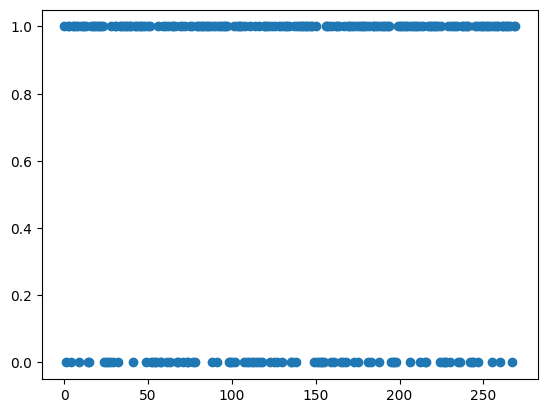

In [34]:
X1=np.arange(0,len(X),1)
plt.scatter(X1, y)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [36]:
y_train

115    0
33     1
184    1
142    1
197    0
      ..
20     1
188    0
71     0
106    1
102    0
Name: Sex, Length: 216, dtype: int64

In [37]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred=regressor.predict(X_test)
X_train=np.arange(0,len(X_train),1)

In [39]:
y_pred

array([ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  8.00354004e-15,
       -5.82352178e-15,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00, -3.70652573e-15, -4.93877369e-15,  1.00000000e+00,
       -1.12976219e-14,  1.00000000e+00, -8.17391328e-15,  1.00000000e+00,
       -1.04507330e-14,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00, -1.92604852e-14,  1.00000000e+00,  1.00000000e+00,
        8.12902103e-15, -4.76645825e-15, -4.39132430e-15,  6.12596756e-16,
        1.00000000e+00,  1.38599647e-14,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00, -9.16633392e-15,  1.00000000e+00, -3.19300666e-15,
       -3.94314382e-15,  7.31545708e-15, -7.25564900e-15,  1.00000000e+00,
        8.43547460e-15,  1.73621895e-16,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  3.86925723e-15, -2.03470245e-15,
        1.00000000e+00,  

In [40]:
y_test-y_pred

30    -2.220446e-15
116   -1.110223e-15
79    -4.884981e-15
127   -8.003540e-15
196    5.823522e-15
137    2.220446e-16
209   -8.437695e-15
45    -7.549517e-15
158   -7.549517e-15
247    3.706526e-15
183    4.938774e-15
268   -7.105427e-15
227    1.129762e-14
82     5.662137e-15
165    8.173913e-15
194   -3.774758e-15
226    1.045073e-14
146   -3.996803e-15
104    1.665335e-15
60    -1.731948e-14
221    3.663736e-15
266   -2.664535e-15
46    -9.325873e-15
42    -7.549517e-15
185    2.997602e-15
9      1.926049e-14
22    -2.220446e-16
199    8.659740e-15
109   -8.129021e-15
24     4.766458e-15
113    4.391324e-15
68    -6.125968e-16
144   -5.107026e-15
224   -1.385996e-14
252    2.109424e-15
6      1.776357e-15
120   -5.773160e-15
67     9.166334e-15
119    8.659740e-15
118    3.193007e-15
25     3.943144e-15
125   -7.315457e-15
244    7.255649e-15
19    -1.154632e-14
77    -8.435475e-15
216   -1.736219e-16
90    -5.107026e-15
208    1.043610e-14
93     1.110223e-16
180   -8.437695e-15


In [41]:
print(regressor.score(X_test,y_test))
#accuracy-96.63%

1.0


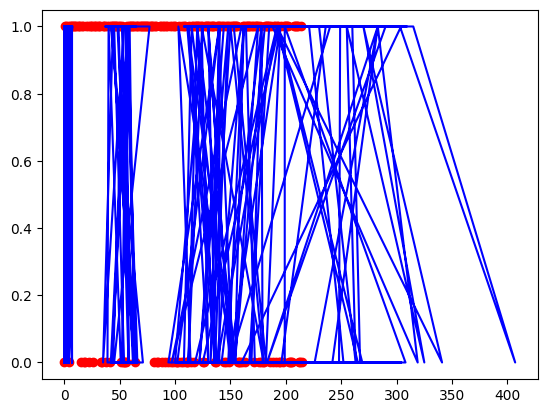

In [42]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_test,y_test, color='blue')
plt.show()

### random forest

In [43]:
from sklearn.model_selection import train_test_split
from sklearn import tree
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [45]:
y_pred=rf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

1.0

In [47]:
pip install pydot

In [48]:
from sklearn.tree import export_graphviz
import graphviz
import pydot

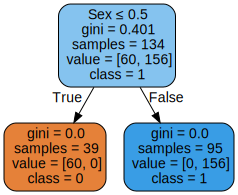

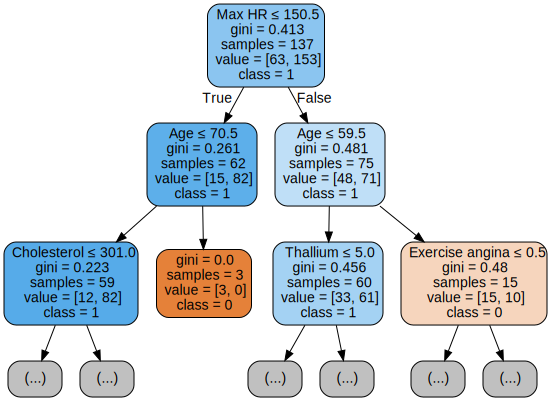

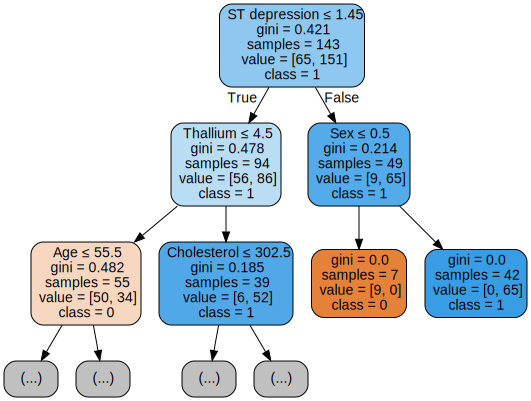

In [49]:
for tree in rf.estimators_[:3]:
    ddata=export_graphviz(tree,out_file=None,max_depth=2,feature_names=X.columns,class_names=np.unique(rf.predict(X)).astype(str),filled=True,rounded=True,special_characters=True)
    graph=graphviz.Source(ddata)
    display(graph)


# MODEL TRAINING: Random forest Regressor

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [51]:
target_variable='Age'

In [52]:
features=['Sex','BP']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(heart_disease[features],heart_disease[target_variable], test_size=0.2, random_state=42)

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

## Hyperparameter tuning
Grid search cv

In [55]:
param_grid_rfc = {'n_estimators': [10, 50, 100, 500], 'max_depth': [5, 10, 20, 50]}

In [56]:
rfc = RandomForestClassifier(random_state=42)

In [57]:
X_train

,Sex,BP
115,0,134
33,1,170
184,1,130
142,1,140
197,0,110
...,...,...
20,1,120
188,0,140
71,0,120
106,1,100


In [58]:
# Use GridSearchCV to find the best hyperparameters
grid_search_rfc = GridSearchCV(rfc, param_grid_rfc, cv=5)
grid_search_rfc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20, 50],
                         'n_estimators': [10, 50, 100, 500]})

In [60]:
grid_search_rfc.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [ ]:
prediction=grid_search_rfc.predict(X_test)
plt.figure(figsize=(8,6))
plt.scatter(y_test,prediction,alpha=0.5)
plt.show()